<a href="https://colab.research.google.com/github/Dms-zi/2022_2_SYU_ML/blob/main/DL/Fish_Trian_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train&Test Set

In [1]:
%pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
%pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
%pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [19]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [20]:
fish_data=[[l,w] for l,w in zip(fish_length,fish_weight)]
fish_target=[1]*35+[0]*14 #두 리스트를 순회하면서 각 길이와 무게를 하나의 리스트로 담은 샘플

input_arr=np.array(fish_data)
target_arr=np.array(fish_target) #배열로 만들기

print(input_arr.shape)

(49, 2)


In [21]:
np.random.seed(42) #랜덤 초기값 42 의미없음
index=np.arange(49) 
np.random.shuffle(index)
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [22]:
train_input=input_arr[index[:35]] #훈련때 입력되는 데이터
train_target=target_arr[index[:35]] #정답 가지고 있는 타깃 1,0

test_input=input_arr[index[35:]] #훈련이 잘되었는지 테스트
test_target=target_arr[index[35:]]

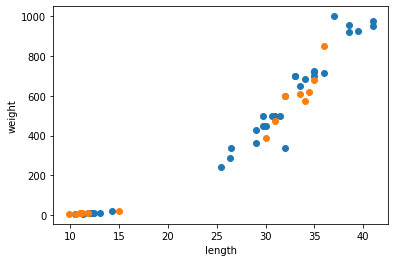

In [23]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(test_input[:,0],test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [24]:
kn=KNeighborsClassifier()
kn=kn.fit(train_input,train_target)

In [25]:
kn.score(test_input,test_target)

1.0

In [26]:
arr=kn.predict(test_input)
arr=np.where(arr>0,"도미","빙어")
print(arr)

['빙어' '빙어' '도미' '빙어' '도미' '도미' '도미' '빙어' '도미' '도미' '빙어' '도미' '도미' '빙어']


In [27]:
 #정답과 predict가 같음
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [28]:
kn.predict([[30,600],[40,800]])

array([1, 1])

EDA

In [29]:
kn.predict([[25,150]]) 

array([0])

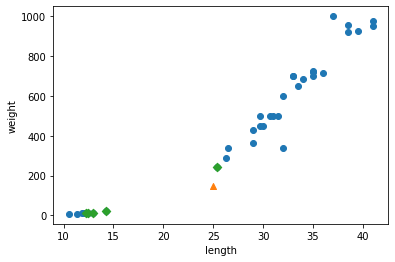

In [34]:
d,i=kn.kneighbors([[25,150]])
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150, marker='^')
plt.scatter(train_input[i,0],train_input[i,1],marker='D')
plt.xlabel('length') #40이 최대이므로 거리계산이 잘못됨, 정규화 필요(같은 스케일 안으로 늘이거나 줄임)
plt.ylabel('weight')
plt.show()

In [17]:
fish_data=np.column_stack((fish_length,fish_weight)) #2차원배열구성 ,1차원연결은 concatenate()
fish_target=np.concatenate((np.ones(35),np.zeros(14)))

In [ ]:
train_input,test_input,train_target,test_target=train_test_split(fish_data,fish_target, stratify=fish_target, random_state=42) #테스트데이터 25%, 원래비율 25%에 맞게 구성함

In [ ]:
#표준점수로 바꾸기 : (원데이터-평균)/표준편차=Z-score
mean=np.mean(train_input,axis=0)
std=np.std(train_input ,axis=0)
train_scaled=(train_input-mean)/std

In [ ]:
d,i=kn.kneighbors([new])
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(new[0],new[1] marker='^')
plt.scatter([i,1],marker='D')
plt.xlabel('length') #40이 최대이므로 거리계산이 잘못됨, 정규화 필요(같은 스케일 안으로 늘이거나 줄임)
plt.ylabel('weight')
plt.show()